In [1]:
# Cell 1: Force TensorFlow to use CPU only (must run before importing tensorflow)
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"   # Disable GPU
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"   # Optional: reduce logs

print("✅ CPU-only mode set (CUDA_VISIBLE_DEVICES = -1)")
print("📍 Working directory:", os.getcwd())


✅ CPU-only mode set (CUDA_VISIBLE_DEVICES = -1)
📍 Working directory: /workspace


In [2]:
# Cell 2: Import libraries and confirm CPU-only
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print("✅ Libraries imported")
print("🧠 TensorFlow version:", tf.__version__)

# Confirm visible devices
cpus = tf.config.list_physical_devices("CPU")
gpus = tf.config.list_physical_devices("GPU")
print(f"🖥️ CPUs visible: {len(cpus)}")
print(f"🎮 GPUs visible: {len(gpus)}")
if len(gpus) == 0:
    print("✅ Running on CPU only")
else:
    print("⚠️ GPU still visible. Restart kernel and run Cell 1 before importing TensorFlow.")


✅ Libraries imported
🧠 TensorFlow version: 2.20.0
🖥️ CPUs visible: 1
🎮 GPUs visible: 0
✅ Running on CPU only


2026-01-28 14:37:25.779712: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
# Cell 3: Configure paths (edit if needed)
import os
from pathlib import Path

IMAGE_PATH = Path("man.png")  # your test image
MODEL_PATH = Path("models/lower_body_mobilenetv2.h5")  # your trained model

# Folder that contains class subfolders (used to rebuild class name order)
LOCAL_ROOT = Path("tight_loose_clothing_augmented/data/lower body clothing categories")

print("✅ Paths configured")
print("🖼️ Image path:", IMAGE_PATH.resolve())
print("🤖 Model path:", MODEL_PATH.resolve())
print("📂 Classes root:", LOCAL_ROOT.resolve())

# Basic checks
print("\n🔎 Checking files...")
print("   Image exists:", IMAGE_PATH.exists())
print("   Model exists:", MODEL_PATH.exists())
print("   Classes root exists:", LOCAL_ROOT.exists())

if not IMAGE_PATH.exists():
    raise FileNotFoundError(f"❌ Image not found: {IMAGE_PATH.resolve()}")
if not MODEL_PATH.exists():
    raise FileNotFoundError(f"❌ Model not found: {MODEL_PATH.resolve()}")
if not LOCAL_ROOT.exists():
    raise FileNotFoundError(f"❌ Class root folder not found: {LOCAL_ROOT.resolve()}")


✅ Paths configured
🖼️ Image path: /workspace/man.png
🤖 Model path: /workspace/models/lower_body_mobilenetv2.h5
📂 Classes root: /workspace/tight_loose_clothing_augmented/data/lower body clothing categories

🔎 Checking files...
   Image exists: True
   Model exists: True
   Classes root exists: True


In [4]:
# Cell 4: Load class names from local folders (sorted)
class_names = sorted([p.name for p in LOCAL_ROOT.iterdir() if p.is_dir()])

print("✅ Class names loaded")
print("📌 Number of classes found:", len(class_names))
print("🏷️ Classes (in order):")
for i, name in enumerate(class_names):
    print(f"   {i}: {name}")

if len(class_names) == 0:
    raise ValueError("❌ No class folders found inside LOCAL_ROOT.")


✅ Class names loaded
📌 Number of classes found: 5
🏷️ Classes (in order):
   0: cargo pants
   1: culottes
   2: shorts
   3: skirt
   4: trousers


In [5]:
# Cell 5: Load model
print("🔄 Loading model...")

model = load_model(MODEL_PATH)

print("✅ Model loaded successfully")
print("📋 Model input shape:", model.input_shape)
print("📋 Model output shape:", model.output_shape)


🔄 Loading model...


✅ Model loaded successfully
📋 Model input shape: (None, 224, 224, 3)
📋 Model output shape: (None, 5)


In [6]:
# Cell 6: Load and preprocess the image
print("🔄 Loading and preprocessing image...")

# MobileNetV2 training used 224x224 and rescale 1/255
IMG_SIZE = (224, 224)

img = load_img(IMAGE_PATH, target_size=IMG_SIZE)  # PIL image resized
img_array = img_to_array(img)                     # (224, 224, 3) float32
img_array = img_array / 255.0                     # normalize to [0,1]
input_tensor = np.expand_dims(img_array, axis=0)  # (1, 224, 224, 3)

print("✅ Image loaded & preprocessed")
print("   Input tensor shape:", input_tensor.shape)
print("   Min/Max values:", input_tensor.min(), input_tensor.max())


🔄 Loading and preprocessing image...
✅ Image loaded & preprocessed
   Input tensor shape: (1, 224, 224, 3)
   Min/Max values: 0.0 0.9490196


🖼️ Displaying man.png...


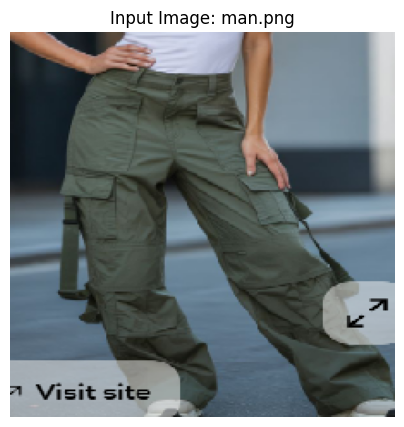

✅ Image displayed


In [7]:
# Cell 7: Display the image
print("🖼️ Displaying man.png...")
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Input Image: man.png")
plt.show()
print("✅ Image displayed")


In [8]:
# Cell 8: Run model prediction
print("🚀 Running prediction...")

probs = model.predict(input_tensor, verbose=0)[0]  # shape: (num_classes,)
print("✅ Prediction completed")
print("📊 Probabilities shape:", probs.shape)

# Basic checks
if len(probs) != len(class_names):
    print("⚠️ WARNING: Model output classes != number of folders")
    print("   Model outputs:", len(probs))
    print("   Folder classes:", len(class_names))


🚀 Running prediction...
✅ Prediction completed
📊 Probabilities shape: (5,)


In [9]:
# Cell 9: Decode prediction (top-1 + top-3)
print("🔎 Decoding prediction...")

top1_idx = int(np.argmax(probs))
top1_class = class_names[top1_idx] if top1_idx < len(class_names) else f"index_{top1_idx}"
top1_conf = float(probs[top1_idx])

print("✅ Top-1 prediction:")
print(f"   Class: {top1_class}")
print(f"   Confidence: {top1_conf:.4f} ({top1_conf*100:.2f}%)")

# Top-3
topk = 3
topk_idx = np.argsort(probs)[::-1][:topk]

print(f"\n🏆 Top-{topk} predictions:")
for rank, idx in enumerate(topk_idx, 1):
    cls = class_names[int(idx)] if int(idx) < len(class_names) else f"index_{int(idx)}"
    conf = float(probs[int(idx)])
    print(f"   {rank}. {cls:30s} -> {conf:.4f} ({conf*100:.2f}%)")


🔎 Decoding prediction...
✅ Top-1 prediction:
   Class: cargo pants
   Confidence: 0.9501 (95.01%)

🏆 Top-3 predictions:
   1. cargo pants                    -> 0.9501 (95.01%)
   2. trousers                       -> 0.0263 (2.63%)
   3. culottes                       -> 0.0174 (1.74%)


In [10]:
# Cell 10: Simple validation message
print("✅ VALIDATION RESULT (Single Image)")
print(f"🖼️ Image: {IMAGE_PATH.name}")
print(f"🤖 Predicted class: {top1_class}")
print(f"🎯 Confidence: {top1_conf*100:.2f}%")


✅ VALIDATION RESULT (Single Image)
🖼️ Image: man.png
🤖 Predicted class: cargo pants
🎯 Confidence: 95.01%


In [11]:
# Cell 11: Define suitability rules
print("⚙️ Setting suitability rules...")

SUITABLE_CLASSES = {"blouse", "crop top", "shirt", "tank top", "tshirt"}

print("✅ Suitable classes set to:")
for c in sorted(SUITABLE_CLASSES):
    print("  -", c)


⚙️ Setting suitability rules...
✅ Suitable classes set to:
  - blouse
  - crop top
  - shirt
  - tank top
  - tshirt


In [12]:
# Cell 12: Make suitability decision based on predicted class
print("🔎 Evaluating suitability...")

pred_class_raw = top1_class
pred_class_norm = str(pred_class_raw).strip().lower()

print(f"🏷️ Predicted class (raw): {pred_class_raw}")
print(f"🏷️ Predicted class (normalized): {pred_class_norm}")
print(f"🎯 Confidence: {top1_conf:.4f} ({top1_conf*100:.2f}%)")

if pred_class_norm in SUITABLE_CLASSES:
    decision = "✅ SUITABLE"
else:
    decision = "❌ NOT SUITABLE"

print("\n📌 Final Decision:", decision)


🔎 Evaluating suitability...
🏷️ Predicted class (raw): cargo pants
🏷️ Predicted class (normalized): cargo pants
🎯 Confidence: 0.9501 (95.01%)

📌 Final Decision: ❌ NOT SUITABLE
